In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
import string

# Import datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
#These are the new features suggested by Kaggle

#Kaggle function
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string in substring:
            return substring
    return np.nan

#These are the list of possible titles given to a passenger
#title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
#                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
#                    'Don', 'Jonkheer']

#We then consolidate these into Mr, Mrs, and Miss
#df_train['Title']=df_train['Name'].map(lambda x: substrings_in_string(x, title_list))

#def replace_titles(x):
#    title=x['Title']
#    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
#        return 'Mr'
#    elif title in ['Countess', 'Mme']:
#        return 'Mrs'
#    elif title in ['Mlle', 'Ms']:
#        return 'Miss'
#    elif title =='Dr':
#        if x['Sex']=='Male':
#            return 'Mr'
#        else:
#            return 'Mrs'
#    else:
#        return title
    
#df_train['Title']=df_train.apply(replace_titles, axis=1)

#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df_train['Deck']=df_train['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list))

#Family_size column
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']

#Age*Class column
#df_train['Age*Class']=df_train['Age']*df_train['Pclass']

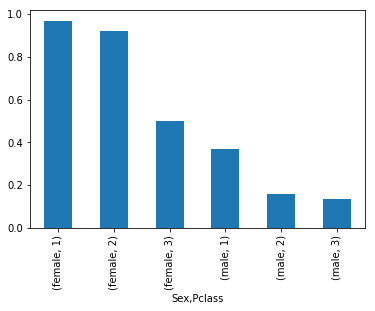

In [3]:
#Survival from Sex, Pclass
pac_group = df_train.groupby(['Sex', 'Pclass']).mean()
pac_group['Survived'].plot.bar()

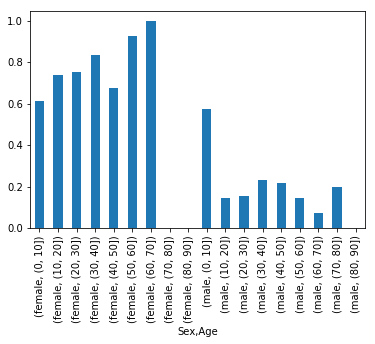

In [4]:
#Survival from Sex, Age
#sa_group = df_train.groupby(['Sex', 'Age']).mean()
#sa_group['Survived'].plot.bar()

#This data is too large

#Fixed issue with above data by using np.arrange

age_group = pd.cut(df_train["Age"], np.arange(0, 100, 10))
sa_group = df_train.groupby(['Sex', age_group]).mean()
sa_group['Survived'].plot.bar()

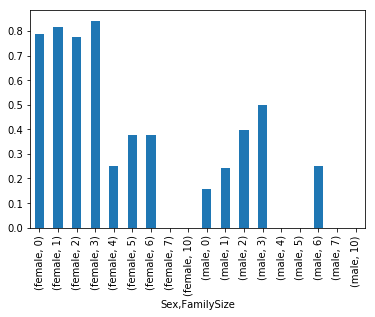

In [5]:
#Survival from Sex, FamilySize
sfs_group = df_train.groupby(['Sex', 'FamilySize']).mean()
sfs_group['Survived'].plot.bar()

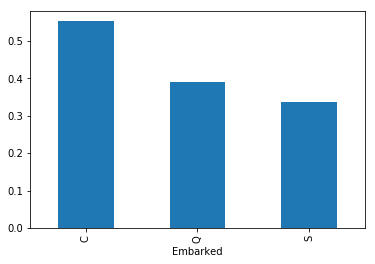

In [6]:
#Survival from Deck, FamilySize
dfs_group = df_train.groupby(['Embarked']).mean()
dfs_group['Survived'].plot.bar()

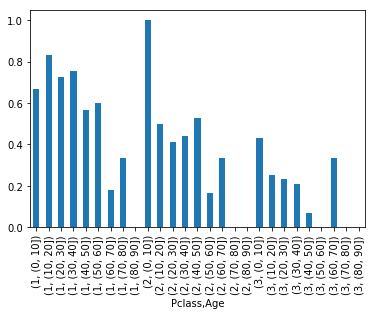

In [7]:
#Survival from Pclass, Age
sfs_group = df_train.groupby(['Pclass', age_group]).mean()
sfs_group['Survived'].plot.bar()

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df_train = df_train.drop(['Name','Ticket', 'Cabin', 'Embarked'], axis=1)
df_test = df_test.drop(['Name','Ticket', 'Cabin', 'Embarked'], axis=1)
le = preprocessing.LabelEncoder()
df_train.Sex = le.fit_transform(df_train.Sex)
df_test.Sex = le.fit_transform(df_test.Sex)
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

X = df_train.drop(['Survived'], 1).values
Y = df_train['Survived'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

df_dt = DecisionTreeClassifier(max_depth=5)

df_dt.fit(X_train, Y_train)
df_dt.score(X_test, Y_test)

0.7988826815642458

In [12]:
#K folds process learned in class
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=16, random_state=42)

for train_index, test_index in skfolds.split(X, Y):
    clone_classifier = clone(df_dt)
    X_train_folds = X[train_index]
    Y_train_folds = Y[train_index]
    X_test_fold = X[test_index]
    Y_test_fold = Y[test_index]
    
    clone_classifier.fit(X_train_folds, Y_train_folds)
    y_pred = clone_classifier.predict(X_test_fold)
    n_correct = sum(y_pred == Y_test_fold)
    print (n_correct/len(y_pred))

0.754385964912
0.771929824561
0.842105263158
0.736842105263
0.80701754386
0.75
0.890909090909
0.8
0.781818181818
0.745454545455
0.836363636364
0.818181818182
0.763636363636
0.8
0.763636363636
0.854545454545
